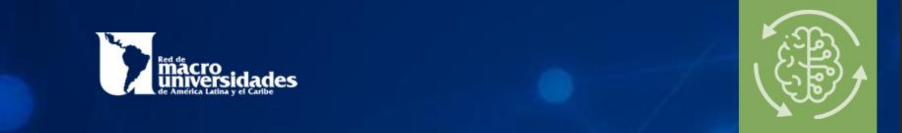

# **ESTADÍSTICA** - *Ejemplo: Modelo de Regresión Lineal y Polinómica*
---

Israel Martinez




**Objetivo**

En esta *notebook* buscamos ejemplificar algunos conceptos relacionados a modelos de regresión lineal y polínómica, mostrando los efectos no deseados que pueden darse, tales como *overfitting*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams.update({"figure.figsize": (10,7)})

## SImulación del conjunto de datos

Comenzamos por definir una función de referencia y graficarla para distintos niveles de "ruido", lo que nos permitirá generar un conjunto de datos para desarrollar el ejemplo.

In [2]:
def create_sinusoidal_data(noise=0.25, num_samples=50):
    x = np.linspace(0, 1, num_samples)
    y = np.sin(2 * np.pi * x) + np.random.normal(scale=noise, size=x.shape)
    return x, y

[]

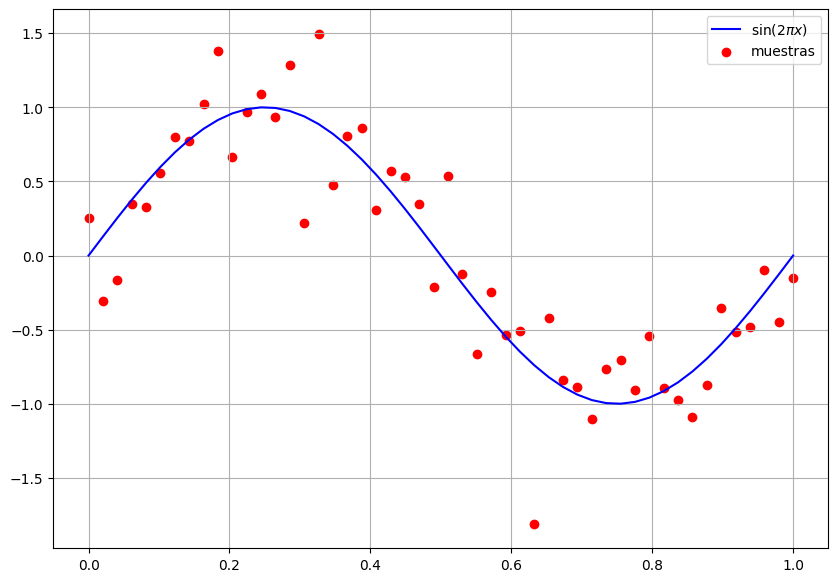

In [3]:
np.random.seed(1234)
x1, y1 = create_sinusoidal_data(0.0, 50)  # sin ruido, solo para referencia
x2, y2 = create_sinusoidal_data(0.3, 50)  # ruido gaussiano con una varianza de 0.3**2
plt.plot(x1, y1, color="blue", label="$\sin(2\pi x)$")
plt.scatter(x2, y2, color="red", label="muestras")
plt.legend()
plt.grid()
plt.plot()

El objetivo será estimar predecir la variable $y$ basándonos el el conjunto de datos que tenemos como muestra.
Para esto, separaremos al conjunto de datos en partes: entrenamiento-validación y test.

## Conjuntos de entrenamiento, validación y test

Construcción de conjuntos de entrenaminento, validación y test o evaluación

In [7]:
X, Y = np.array(x2), np.array(y2)  # Nuestro conjunto de datos estará dado por el segundo conjunto definido anteriormente

n_samples = len(X)  # número total de muestras

n_trainval = int(0.8 * n_samples)  # 80% de muestras para entrenamineto y validación
n_test = n_samples - n_trainval  # el resto como muestras de test
print(f"{n_trainval} muestras de entrenamiento+validación, {n_test} muestras de test")

40 muestras de entrenamiento+validación, 10 muestras de test


A continuación buscaremos separa de manera aleatoria el conjutnto de datos en dos conjuntos: el primero para usarlo de entrenamiento del modelo  y el otro para test.

[ 5 16 29  6 30 31 28 13 27  7  0 48 45 33 46 49  4 14  1 42  2 26 20 10
  3 43 11 36 15  9 35 37 41 40 18 17 19 22 21 47 23  8 32 44 12 24 39 25
 34 38]


[]

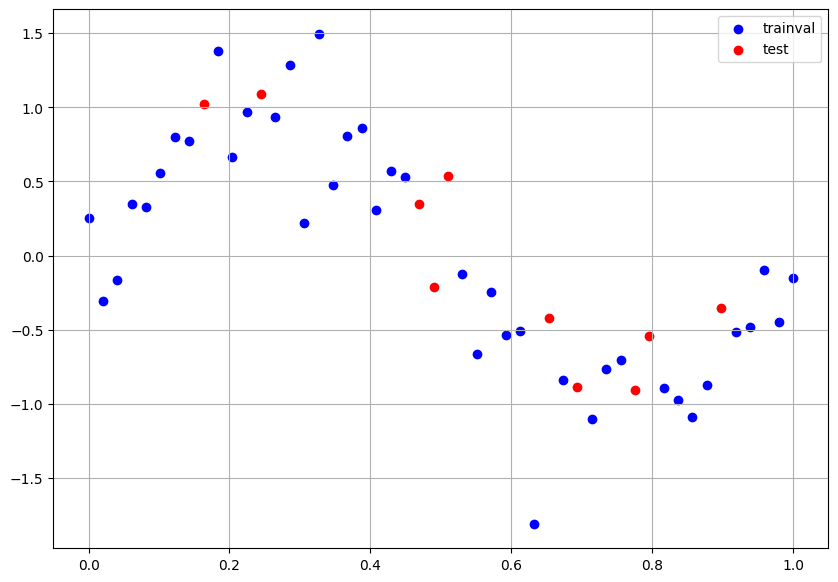

In [8]:
# permutación de los índices entre 0 y N_SAMPLES-1
idxs = np.random.permutation(n_samples)
print(idxs)

# subconjunto de índices (permutados) que corrresponden al conjunto trainval
idxs_trainval = idxs[:n_trainval]
X_trainval, Y_trainval = X[idxs_trainval], Y[idxs_trainval]

# idem test
idxs_test = idxs[n_trainval:]
X_test, Y_test = X[idxs_test], Y[idxs_test]

# graficamos estos subconjuntos (disjuntos)
plt.scatter(X_trainval, Y_trainval, color="blue", label="trainval")
plt.scatter(X_test, Y_test, color="red", label="test")
plt.legend()
plt.grid()
plt.plot()

### Modelo de Regresión Lineal

Ahora entrenaremos un modelo de regresión lineal simple, de modo que buscaremos estimar la recta:

$$\hat{y} = w_o + w_1 x$$

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Instanciar la clase que provee la regresión lineal
lm = LinearRegression()

# ajustar el modelo
lm.fit(X_trainval.reshape(-1, 1), Y_trainval)

# Generar la predicción
y_pred = lm.predict(X_test.reshape(-1, 1))

# Usar alguna métrica como MSE u otra para imprimir el error
print('MSE:', mean_squared_error(Y_test, y_pred))

MSE: 0.1795241316458154


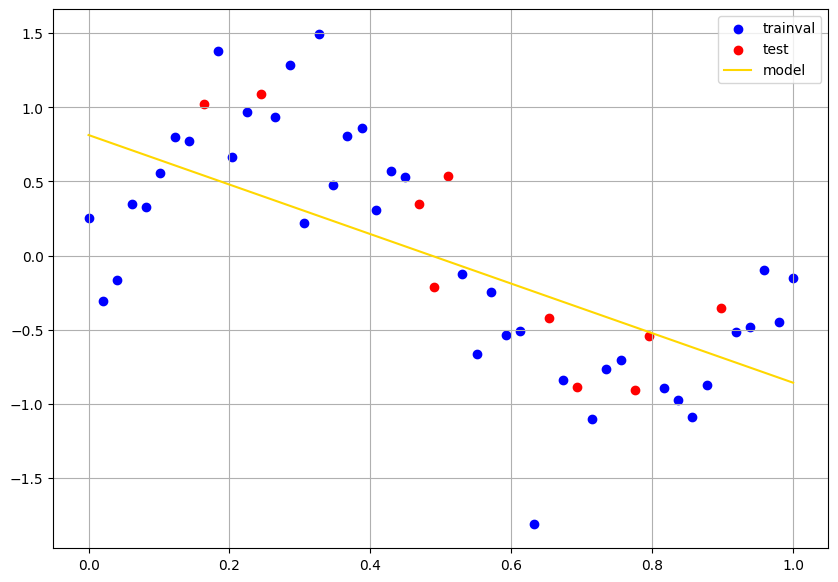

In [11]:
plt.scatter(X_trainval, Y_trainval, color="blue", label="trainval")
plt.scatter(X_test, Y_test, color="red", label="test")

X, Y = np.array(x1), np.array(y1)
Y_pred = lm.predict(X.reshape(-1, 1))

#plt.plot(X, Y, color="green", label="$\sin(2\pi x)$")
plt.plot(X, Y_pred, color="gold", label="model")
plt.legend()
plt.grid()
plt.show()

In [18]:
print("w0 = ", lm.intercept_, "w1 = ", lm.coef_[0])

w1 =  0.8127735289386897 w1 =  -1.6705831602982357


### Modelo de Regresión Polinómica

Como vimos, el conjunto "trainval" es el único que debemos utilizar para el entrenamiento de los modelos. Si queremos hacer ajuste de los hiperparámetros (p.ej. orden del polinomio) debemos contar con un conjunto auxiliar de validación. Para ello repetiremos el proceso de indexado aleatorio y particionado sobre el conjunto trainval

In [ ]:
n_train = int(0.8 * n_trainval)
n_val = n_trainval - n_train
print(f"{n_train} muestras de entrenamiento, {n_val} muestras de validación")

idxs = np.random.permutation(n_trainval)  # IMPORTANTE: los índices son sobre el conjunto trainval!

idxs_train = idxs[:n_train]
X_train, Y_train = X_trainval[idxs_train], Y_trainval[idxs_train]

idxs_val = idxs[n_train:]
X_val, Y_val = X_trainval[idxs_val], Y_trainval[idxs_val]

32 muestras de entrenamiento, 8 muestras de validación


[]

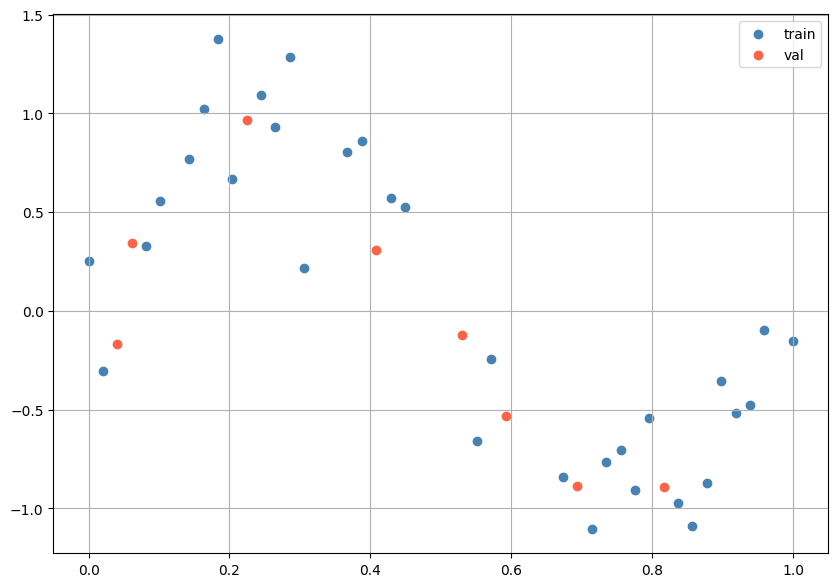

In [ ]:
# graficamos estos subconjuntos (disjuntos)
plt.scatter(X_train, Y_train, color="steelblue", label="train")
plt.scatter(X_val, Y_val, color="tomato", label="val")
plt.legend()
plt.grid()
plt.plot()

## Características polinomiales

Como vimos, cada par (x,y) corresponde a un escalar (x) y su valor objetivo (y). Podríamos  transformar este problema y representar cada $x$ como un vector de potencias de $x$. Esto nos permite generalizar el problema y tratarlo como uno lineal en N dimensiones:

$$\hat{y} = w_0 + w_1\,x + w_2 \,x^2 + w_3 \,x^3 + \dots + + w_M \,x^M $$

La siguiente función nos permitirá generar las potencias de la variable $x$ para tratar poder entrenar un modelo de estas características.

In [ ]:
def polynomial_features(X, M):
    assert isinstance(X, np.ndarray)
    X = X.reshape(-1, 1)
    return np.concatenate([X**m for m in range(M+1)], axis=1)

#M = 5
#X_train = polynomial_features(X_train, M)  # conjunto de entrenamiento
#print(X_train.shape, Y_train.shape)
#X_val = polynomial_features(X_val, M)  # conjunto de validación
#print(X_val.shape, Y_val.shape)
#X_test = polynomial_features(X_test, M)  # conjunto de test: para evaluación FINAL
#print(X_test.shape, Y_test.shape)

(32, 6) (32,)


## Entrenamiento, selección de hyperparámetros y evaluación

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

registry = []

for M in range(20):
    X_train_ = polynomial_features(X_train, M)
    X_val_ = polynomial_features(X_val, M)

    model = LinearRegression(fit_intercept=False)  # el término de bias ya está incorporado (potencia 0 del poly)
    model.fit(X_train_, Y_train)

    Y_train_pred = model.predict(X_train_)
    train_err = mean_squared_error(Y_train, Y_train_pred)

    Y_val_pred = model.predict(X_val_)
    val_err = mean_squared_error(Y_val, Y_val_pred)

    registry.append([M, train_err, val_err])

    print(f"M={M}, error: {val_err:.5f}")

M=0, error: 0.38794
M=1, error: 0.26908
M=2, error: 0.25448
M=3, error: 0.03159
M=4, error: 0.03075
M=5, error: 0.02629
M=6, error: 0.02305
M=7, error: 0.01929
M=8, error: 0.01798
M=9, error: 0.04264
M=10, error: 0.04118
M=11, error: 0.04314
M=12, error: 0.03697
M=13, error: 0.03535
M=14, error: 0.02804
M=15, error: 0.02715
M=16, error: 0.22482
M=17, error: 0.07820
M=18, error: 0.30419
M=19, error: 0.21791


¿Cuál es el mejor modelo?

mejor M=8


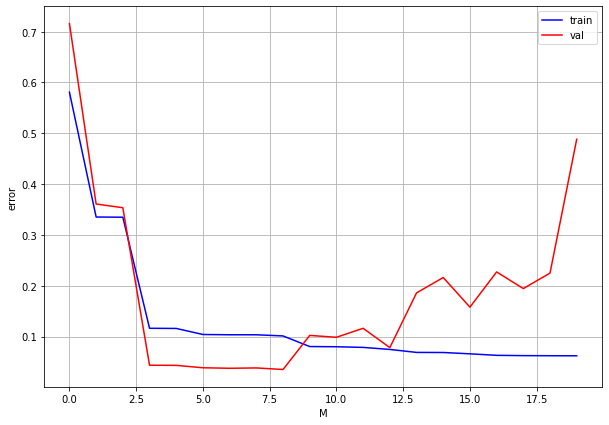

In [ ]:
# obtener el valor de M que resultó en el menor error cuadrático
registry = np.array(registry)
best_idx = np.argmin(registry[:, 2])
best_M = int(registry[best_idx][0])
print(f"mejor M={best_M}")

plt.plot(registry[:, 0], registry[:, 1], color="blue", label="train")
plt.plot(registry[:, 0], registry[:, 2], color="red", label="val")
plt.legend()
plt.grid()
plt.xlabel("M")
plt.ylabel("error")
plt.show()


In [ ]:
# entrenar el modelo final. Puede ser sobre el conjunto trainval para aprovechar las muestras de entrenamiento disponibles
X_trainval_ = polynomial_features(X_trainval, best_M)
X_test_ = polynomial_features(X_test, best_M)
model = LinearRegression(fit_intercept=False)  # el término de bias ya está incorporado (potencia 0 del poly)
model.fit(X_trainval_, Y_trainval)

Y_test_pred = model.predict(X_test_)
err = mean_squared_error(Y_test, Y_test_pred)
print(f"test error: {err:.5f}")

test error: 0.10642


Graficamos:

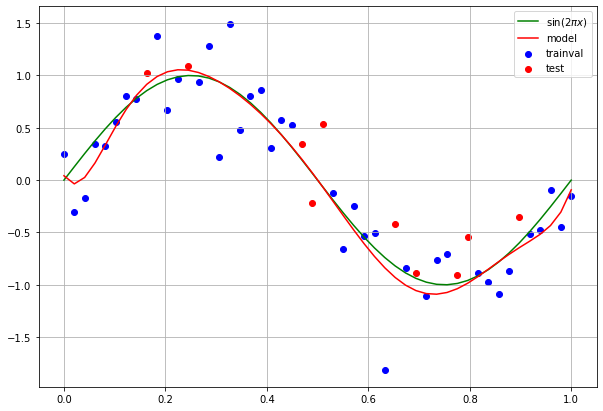

In [ ]:
plt.scatter(X_trainval, Y_trainval, color="blue", label="trainval")
plt.scatter(X_test, Y_test, color="red", label="test")

X, Y = np.array(x1), np.array(y1)
Y_pred = model.predict(polynomial_features(X, best_M))

plt.plot(X, Y, color="green", label="$\sin(2\pi x)$")
plt.plot(X, Y_pred, color="red", label="model")
plt.legend()
plt.grid()
plt.show()